# demo
This notebook demonstrates a walkthrough of the various datasets included in this lab.

Specifically, this notebook entertains a line of inquiry, starting with a target image, then speculates as to what flight(s) may have given rise to the observed contrail. The line of inquiry finishes with observational & predicted cross-references (cross-references being an inquiry as to whether or not the contrail observed in the image was similarly observed via satellite and/or predicted to have formed via the CoCip model forecast).


## target image
First, let us pick a target image, and pull in the field-of-view and metadata associated with that image.

> 🖼️ target: `4xTdYYQZmj38MsRwWEH3`

Premature end of JPEG file


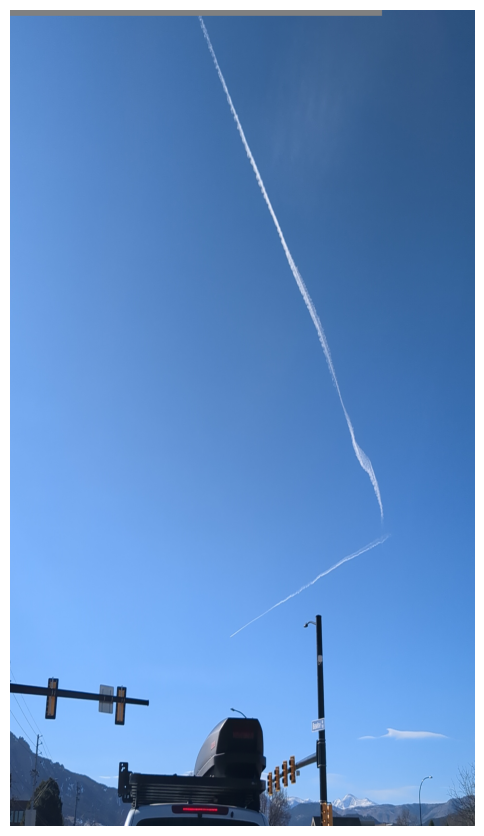

In [1]:
from google.cloud import storage
import tempfile
import matplotlib.pyplot as plt
import cv2 as cv

GCS_BUCKET = "2024-06-contrails-workshop"
PHOTO_ID = "4xTdYYQZmj38MsRwWEH3"
PHOTO_BLOB = f"observerapp_hackathon/images/{PHOTO_ID}"

gcs_client = storage.Client()
gcs_bucket = gcs_client.get_bucket(GCS_BUCKET)

with tempfile.NamedTemporaryFile() as tmp:
    blob = gcs_bucket.blob(PHOTO_BLOB)
    blob.download_to_file(tmp)
    fig, ax = plt.subplots(1,figsize=(6,10.6))
    img_color = cv.imread(tmp.name)
    ax.imshow(img_color[...,::-1],aspect='auto')
    ax.set_axis_off()

Initial observations of the image suggest that the contrails were formed by two aircraft, the lower contrail perhaps being actively generated at the time of the photograph (hard to say if the bottom contrail has an aircraft actively in the frame).
Both contrails appear to be of short lifespan, thus we suspect they were formed within a reasonably short time-delta from when the timestamp of the photo.

In [2]:
from google.cloud import bigquery
import pandas as pd

IMAGE_QUERY = """SELECT meta_tb.id AS id, meta_tb.timestamp AS timestamp, fov_tb.level AS flight_level, fov_tb.geometry AS fov_polygon
                 FROM `contrails-301217.workshop_observerapp.image_metadata` meta_tb 
                 INNER JOIN `contrails-301217.workshop_observerapp.image_field_of_view` fov_tb 
                 ON meta_tb.id=fov_tb.id WHERE fov_tb.id=@image_id"""
param_cfg = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ScalarQueryParameter("image_id", "STRING", PHOTO_ID),
    ]
)

bq_client = bigquery.Client()

image_query = bq_client.query(query=IMAGE_QUERY, job_config=param_cfg)
resp_rows = image_query.result()
image_df = resp_rows.to_dataframe()
display(image_df)


,id,timestamp,flight_level,fov_polygon
0,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,260,"POLYGON((-105.443966 40.050173, -105.579936 40..."
1,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,270,"POLYGON((-105.4541785 40.0525715, -105.596708 ..."
2,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,280,"POLYGON((-105.464392 40.054969, -105.613482 40..."
3,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,290,"POLYGON((-105.474607 40.057365, -105.630258 40..."
4,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,300,"POLYGON((-105.484823 40.0597595, -105.647036 4..."
5,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,310,"POLYGON((-105.495039 40.0621525, -105.663815 4..."
6,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,320,"POLYGON((-105.5052565 40.064545, -105.680596 4..."
7,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,330,"POLYGON((-105.515475 40.066936, -105.697379 40..."
8,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,340,"POLYGON((-105.525694 40.0693255, -105.714163 4..."
9,4xTdYYQZmj38MsRwWEH3,2024-02-28 22:03:30.772000+00:00,350,"POLYGON((-105.5359145 40.0717135, -105.73095 4..."


## flight traffic
Now, let us consider which aircraft(s) may have been within the field of view of the camera within 1 hour (backward in time) from when the photo was captured.

To do this, we will query for all aircraft `(waypoint, flight_level)` position falls within a field-of-view polygon of the camera.
We will consider all aircraft waypoints with timestamp between `(image_timestamp - 1hr, image_timestamp)`.

In [8]:
ADSB_TO_IMAGE_QUERY = """ WITH image_tb AS 
                          (SELECT meta_tb.id AS id, meta_tb.timestamp AS timestamp, fov_tb.level AS flight_level, fov_tb.geometry AS fov_polygon  
                          FROM `contrails-301217.workshop_observerapp.image_metadata` meta_tb 
                          INNER JOIN `contrails-301217.workshop_observerapp.image_field_of_view` fov_tb 
                          ON meta_tb.id=fov_tb.id WHERE fov_tb.id=@image_id)
                          
                          SELECT f_tb.timestamp, (image_tb.timestamp-TIMESTAMP(f_tb.timestamp)) AS timestamp_lag, f_tb.flight_level, f_tb.position AS wp_position, f_tb.icao_address, f_tb.aircraft_type_icao, image_tb.fov_polygon  
                          FROM `contrails-301217.workshop_observerapp.adsb_clean_resampled` f_tb 
                          INNER JOIN image_tb ON f_tb.flight_level=image_tb.flight_level 
                          WHERE TIMESTAMP(f_tb.timestamp) BETWEEN '2024-02-28T21:03:30' AND '2024-02-28T22:03:30' 
                          AND ST_INTERSECTS(f_tb.position, image_tb.fov_polygon) 
                          ORDER BY f_tb.icao_address, f_tb.timestamp """

param_cfg = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ScalarQueryParameter("image_id", "STRING", PHOTO_ID),
    ]
)

adsb_query = bq_client.query(query=ADSB_TO_IMAGE_QUERY, job_config=param_cfg)
resp_rows = adsb_query.result()
adsb_df = resp_rows.to_dataframe()
# timestamp_lag is marshalled from a BQ Interval object; here, convert to a unit of seconds
adsb_df["timestamp_lag"] = adsb_df["timestamp_lag"].apply(lambda r: int(r.microseconds // 1e6))
display(adsb_df)

/Users/nickmasson/anaconda3/lib/python3.11/site-packages/google/cloud/bigquery/_pandas_helpers.py:193: UserWarning: Unable to determine type for field 'timestamp_lag'.
  warnings.warn("Unable to determine type for field '{}'.".format(bq_field.name))


,timestamp,timestamp_lag,flight_level,wp_position,icao_address,aircraft_type_icao,fov_polygon
0,2024-02-28 21:35:00,1710,360,POINT(-105.44072 40.051636),A126EA,B38M,"POLYGON((-105.546136 40.0741005, -105.747738 4..."
1,2024-02-28 21:36:00,1650,360,POINT(-105.572754 40.00946),A126EA,B38M,"POLYGON((-105.546136 40.0741005, -105.747738 4..."
2,2024-02-28 21:37:01,1589,360,POINT(-105.706482 39.964142),A126EA,B38M,"POLYGON((-105.546136 40.0741005, -105.747738 4..."
3,2024-02-28 21:09:02,3268,220,POINT(-105.47393 39.959137),A288FF,B738,"POLYGON((-105.512865 40.062199, -105.506878 39..."
4,2024-02-28 22:03:01,29,380,POINT(-105.708511 40.072445),A2B416,B39M,"POLYGON((-105.566581 40.0788705, -105.781319 4..."
5,2024-02-28 21:41:02,1348,370,POINT(-105.718254 40.016861),A325FD,A319,"POLYGON((-105.556358 40.076486, -105.764528 40..."
6,2024-02-28 21:42:03,1287,370,POINT(-105.606018 39.923172),A325FD,A319,"POLYGON((-105.556358 40.076486, -105.764528 40..."
7,2024-02-28 21:59:01,269,320,POINT(-105.543335 39.940704),A336E3,B738,"POLYGON((-105.5052565 40.064545, -105.680596 4..."
8,2024-02-28 22:02:00,90,350,POINT(-105.378479 40.01088),A44C70,B738,"POLYGON((-105.5359145 40.0717135, -105.73095 4..."


In [19]:
# the icao_address is a unique identifier of the aircraft
adsb_df.groupby("icao_address").agg({'timestamp_lag': ['min', 'max'], 'flight_level': ['min', 'max'], 'aircraft_type_icao': ['unique']}) 

timestamp_lag       flight_level      aircraft_type_icao
                       min   max          min  max             unique
icao_address                                                         
A126EA                1589  1710          360  360             [B38M]
A288FF                3268  3268          220  220             [B738]
A2B416                  29    29          380  380             [B39M]
A325FD                1287  1348          370  370             [A319]
A336E3                 269   269          320  320             [B738]
A44C70                  90    90          350  350             [B738]

Given our prior hypothesis that these contrails are likely short-lived, it seems reasonable to posit that aircraft `A44C70`, `A2B416` and/or `A336E3` would be the aircrafts that generated these contrails.

`A44C70` passed through the field of view of the camera 90 seconds prior to the photograph, cruising at a flight level of `350`.

`A2B416` passed through the fov of the camera 29 seconds prior to the photograph, cruising at a fl of `380`.

`A336E3` passed through the fov of the camera 269 seconds prior to the photograph, cruising at fl of `320`.

In the image, we observe two distinct contrails, yet we cannot disambiguate which of the three aircraft is likely to have generated those contrails.

Two plausible scenarios exist:
- contrails are formed at all three flight levels in this region ([`320`, `380`, `350`]), but the characteristic lifetime/residence-period of the contrail is under 4 minutes (240 sec), thus we do not observe the contrail from `A336E3` as it has fully sublimated
  
- contrails are formed at two of the three flight levels, thus we only observe contrails from the two aircraft flying at those flight levels


Cross-referencing with the contrail prediction at each flight level may help bound this open equation and provide evidence in support of one of these two scenarios.

## CoCip Regions
Let us now consider the contrail predicition forecasts generated using the CoCip model in PyContrails.

As noted above, let us constrain our inquiry to the nearterm period surounding the image timestamp.
Furthermore, given that this image was captured during the daytime and is likely of short lifetime,
we expect the contrails would have a small cooling impact.

Similar to the query for the ADS-B flight waypoint data, we will join our image field-of-view polygons with our CoCip prediction polygons, on a per flight-level basis, and look at those flight-levels within image view where we have a predicted contrail region.

The CoCip polygons are predicted on-the-hour, thus we will fetch polygon from the bottom of the hour relative to the image timestamp.

Furthermore, we will query for polygons that have a threshold of `-1`, which will return all regions where we expect a cooling contrail to have originated at the target time.

In [23]:
COCIP_TO_IMAGE_QUERY = """ WITH image_tb AS 
                          (SELECT meta_tb.id AS id, meta_tb.timestamp AS timestamp, fov_tb.level AS flight_level, fov_tb.geometry AS fov_polygon  
                          FROM `contrails-301217.workshop_observerapp.image_metadata` meta_tb 
                          INNER JOIN `contrails-301217.workshop_observerapp.image_field_of_view` fov_tb 
                          ON meta_tb.id=fov_tb.id WHERE fov_tb.id=@image_id)
                          
                          SELECT cocip_tb.hres_model_run_at, cocip_tb.flight_level, cocip_tb.regions AS cocip_regions, image_tb.fov_polygon AS image_fov  
                          FROM `contrails-301217.workshop_observerapp.cocip_regions` cocip_tb 
                          INNER JOIN image_tb ON cocip_tb.flight_level=image_tb.flight_level 
                          WHERE cocip_tb.timestamp=@cocip_regions_timestamp AND cocip_tb.threshold=-1 AND ST_INTERSECTS(cocip_tb.regions, image_tb.fov_polygon)
                          """

param_cfg = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ScalarQueryParameter("image_id", "STRING", PHOTO_ID),
        bigquery.ScalarQueryParameter("cocip_regions_timestamp", "STRING", image_df.timestamp.iloc[0].strftime('%Y-%m-%dT%H:00:00')),
    ]
)

cocip_query = bq_client.query(query=COCIP_TO_IMAGE_QUERY, job_config=param_cfg)
resp_rows = cocip_query.result()
cocip_df = resp_rows.to_dataframe()

display(cocip_df)

,hres_model_run_at,flight_level,cocip_regions,image_fov
0,2024-02-27 06:00:00+00:00,360,"MULTIPOLYGON(((118 -44.62, 118.12 -44.75, 118 ...","POLYGON((-105.546136 40.0741005, -105.747738 4..."
1,2024-02-27 06:00:00+00:00,370,"MULTIPOLYGON(((-150.16 -48.59, -150.06625 -48....","POLYGON((-105.556358 40.076486, -105.764528 40..."
2,2024-02-27 06:00:00+00:00,380,"MULTIPOLYGON(((117 -40.38, 117.12 -40.5, 117 -...","POLYGON((-105.566581 40.0788705, -105.781319 4..."
